In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
    
from smfret_analysis import print_info, Plotter

In [2]:
print_info()

smFRET analysis software version 2.1
(git revision 2.2-22-g8665d59)
Output version 13
Using sdt-python version 17.0


# FRET efficiencies

In [3]:
p = Plotter()

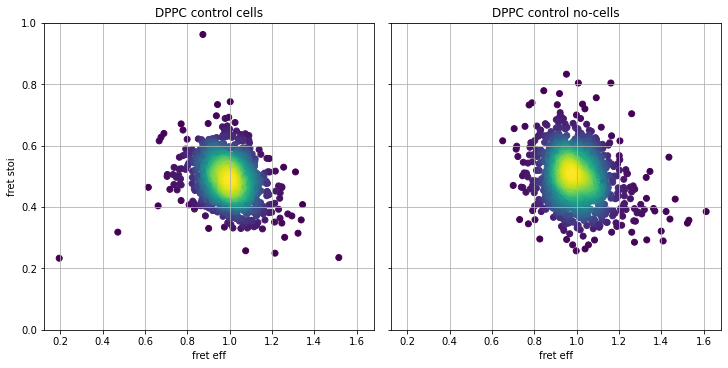

In [4]:
fig, ax = p.scatter(frame=None, ylim=(0, 1));
fig.savefig("scatter.pdf", bbox_inches="tight")

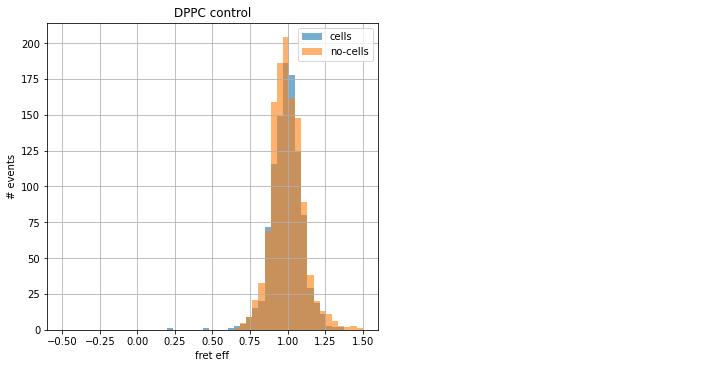

In [5]:
fig, ax = p.hist(group_re=(r"(.+) (cells|no-cells)", 1, 2),
                 hist_args={"alpha": 0.6, "density": False});
fig.savefig("hist.pdf", bbox_inches="tight")